Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <</insert link>>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# %matplotlib inline

In [93]:
data = pd.read_csv("movie_metadata_cleaned.csv")

In [94]:
data
# checking the names of each columns
print(list(data.columns))

['Unnamed: 0', 'movie_title', 'color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

director_name
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Tim Burton           16
Steven Soderbergh    16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Name: count, dtype: int64


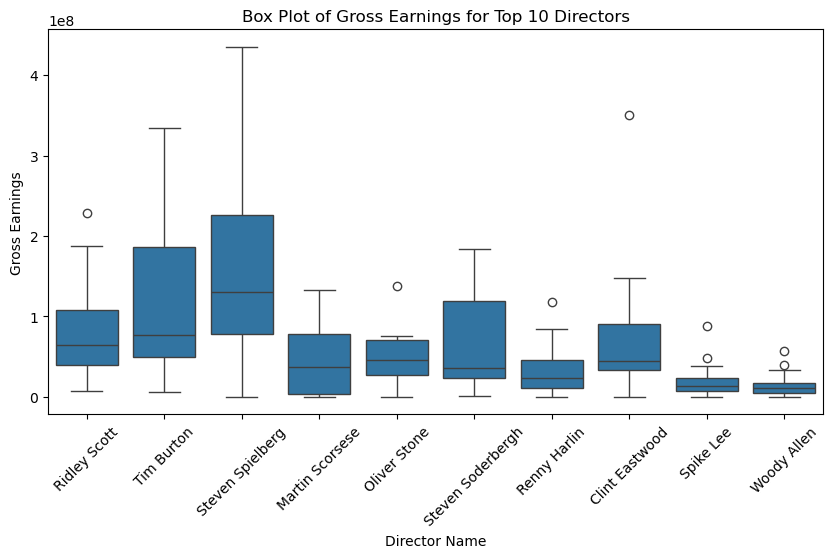

In [96]:
# getting nonzero director names 
filtered_directors = data[data["director_name"] != "0"]

# getting the top ten director 
top_directors = filtered_directors["director_name"].value_counts().head(10)
print(top_directors) # checking result
# assigning index 
top_director_names = top_directors.index   

# getting the gross and director name and saving it to a new data frame
gross_data = data[["gross", "director_name"]]

# getting the gross sum of each director 
gross_by_director = gross_data.groupby("director_name")["gross"].sum()
# matching the directors in top ten data frame with the one having a summed up gross
top_directors_data = data[data["director_name"].isin(top_director_names)]


# plotting the top ten director and their summed up gross earnings with boxplot 
plt.figure(figsize=(10, 5))
sns.boxplot(x='director_name', y='gross', data=top_directors_data)
plt.xticks(rotation=45)   
plt.title('Box Plot of Gross Earnings for Top 10 Directors')
plt.ylabel('Gross Earnings')
plt.xlabel('Director Name')
plt.show()

 

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

      num_critic_for_reviews  imdb_score        gross
0                      723.0         7.9  760505847.0
1                      302.0         7.1  309404152.0
2                      602.0         6.8  200074175.0
3                      813.0         8.5  448130642.0
4                        0.0         7.1          0.0
...                      ...         ...          ...
5039                    43.0         7.5          0.0
5040                    13.0         6.3          0.0
5041                    14.0         6.3      10443.0
5042                    43.0         6.6      85222.0
5043                     0.0         0.0          0.0

[5044 rows x 3 columns]


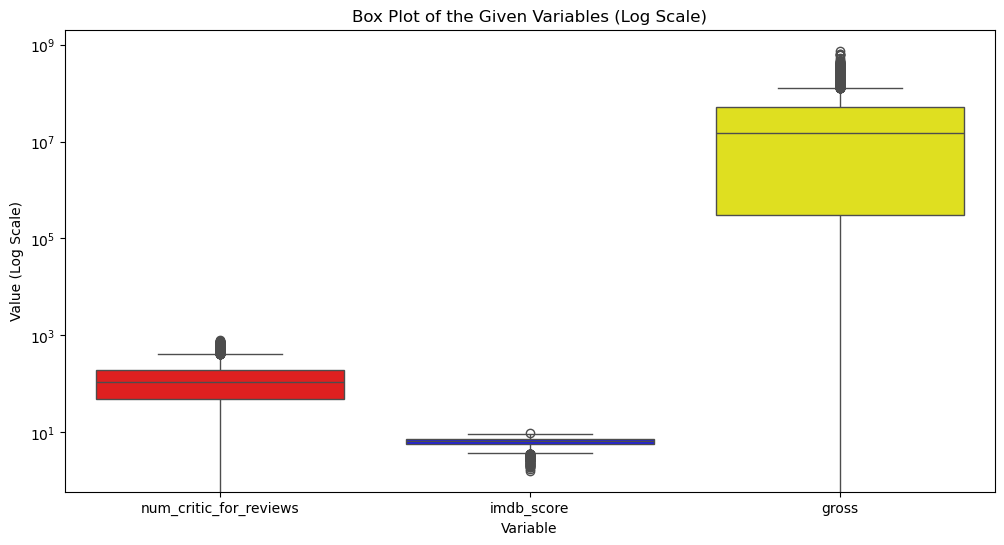

In [98]:
# # print(list(data.columns))

# filtering the required variables from data and saving it to a new data frame
required_data = data[["num_critic_for_reviews", "imdb_score", "gross"]]
print(required_data)
 
# create a figure with specified size
plt.figure(figsize=(12, 6))

# melt the dataframe to long-form for easier plotting with a boxplot
melted_data = required_data.melt(var_name='Variable', value_name='Value')

# creating the boxplot
sns.boxplot(x='Variable', y='Value', data=melted_data, hue='Variable', palette={"num_critic_for_reviews": "red", "imdb_score": "blue", "gross": "yellow"})

# applying a logarithmic scale to the y-axis becuase plotting it without applying logarithmic scale
# would not show a boxplot for imdb score and critic review because the gross have far higher values
# than the other two
plt.yscale('log')

# setting axis labels and title
plt.xlabel("Variable")
plt.ylabel("Value (Log Scale)")
plt.title("Box Plot of the Given Variables (Log Scale)")

plt.show()




## Compute Sales (Gross - Budget), add it as another column

In [100]:
# filtering data by getting the budget and gross and saving them in new data frames respectively
budget = data["budget"]
gross = data["gross"]

# new_data = data.copy()

# adding the gross - budget as a new column in dataframe data
data["sales"] = gross - budget

# checking the updated dataframe
print(list(data.columns))
print(data["sales"])


['Unnamed: 0', 'movie_title', 'color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'sales']
0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
4               0.0
           ...     
5039            0.0
5040        -1400.0
5041        10443.0
5042        84122.0
5043            0.0
Name: sales, Length: 5044, dtype: float64


## Which directors garnered the most total sales?

In [102]:
# getting the sum of sales for each directors
sales_by_director = data.groupby('director_name')['sales'].sum().reset_index()
# getting the highest sales by director by using max function
most_total_sales_director = sales_by_director.max()
print(most_total_sales_director)

director_name    Étienne Faure
sales             2451332231.0
dtype: object


## Plot sales and average likes as a scatterplot. Fit it with a line.

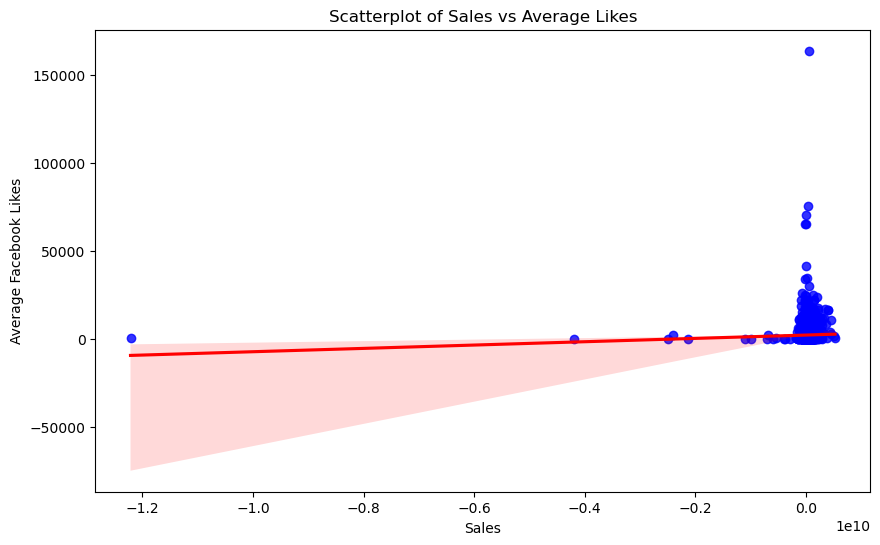

In [104]:
# getting the mean for all the facebook likes for each row 
average_likes = data[['director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes']].mean(axis=1)
# adding the computed mean as a new column for the dataframe
data['average_likes'] = average_likes
# plotting the sales and average likes as a scatterplot
plt.figure(figsize=(10, 6))
# independent variable x is the sales and the dependent variable y is the average likes
sns.regplot(x='sales', y='average_likes', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel('Sales')
plt.ylabel('Average Facebook Likes')
plt.title('Scatterplot of Sales vs Average Likes')
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4                           Documentary
                     ...               
5039       Crime|Drama|Mystery|Thriller
5040              Drama|Horror|Thriller
5041               Comedy|Drama|Romance
5042                        Documentary
5043            Romance|Comedy|Filipino
Name: genres, Length: 5044, dtype: object
Romance: 8262484517.0
Comedy: 12832689231.0
Action: 4157220813.0
Fantasy: 8186508252.0
The genre with the highest sales is Comedy with sales amount of 12832689231.0.


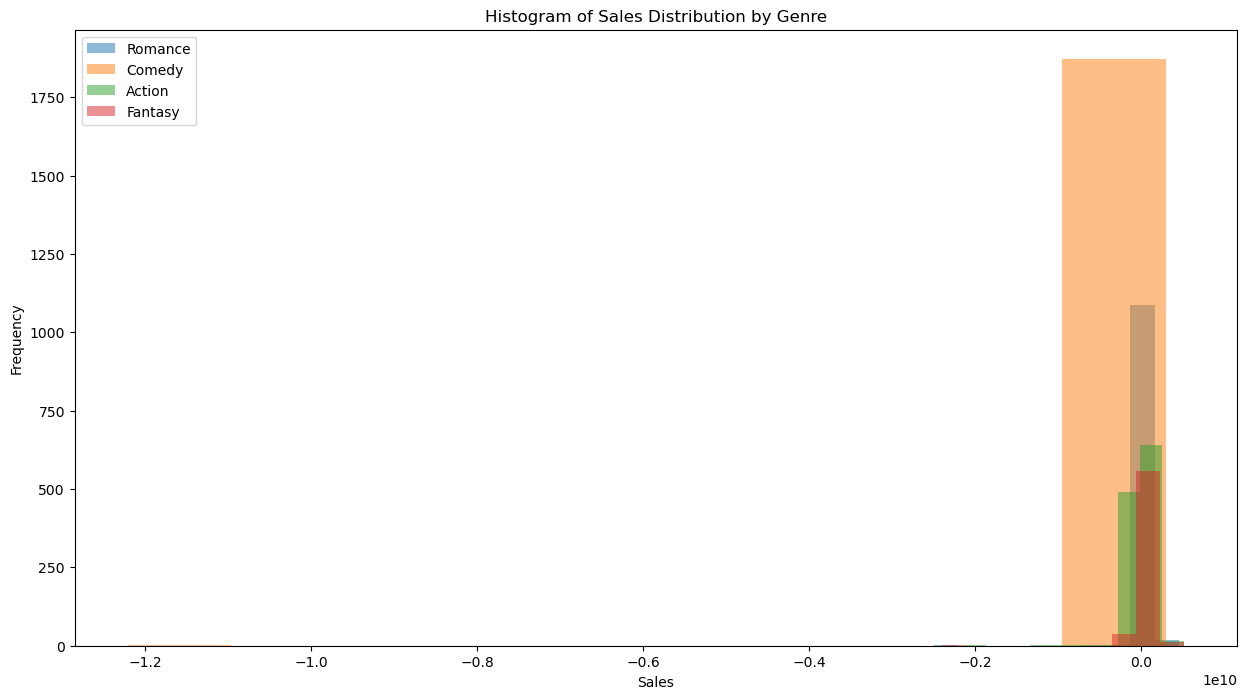

In [106]:
print(data['genres']) # checking the genres 
# row_index = 0
# col_name = 'genres'
# romance = new_data.at[row_index:  , col_name] 
# print(romance)

# filtering the data frame by their genres and getting the sum of their sales
romance = data[data['genres'].str.contains('Romance', case=False, na=False)]
romance_sales = romance['sales'].sum()
print(f"Romance: {romance_sales}")

comedy = data[data['genres'].str.contains('Comedy', case=False, na=False)]
comedy_sales = comedy['sales'].sum()
print(f"Comedy: {comedy_sales}")

action = data[data['genres'].str.contains('Action', case=False, na=False)]
action_sales = action['sales'].sum()
print(f"Action: {action_sales}")

fantasy = data[data['genres'].str.contains('Fantasy', case=False, na=False)]
fantasy_sales = fantasy['sales'].sum()
print(f"Fantasy: {fantasy_sales}")

# array for the 4 given genres
genres_arr = ['Romance', 'Comedy', 'Action', 'Fantasy']
sales = {} # a dictionary for sales

for genre in genres_arr:
    genre_data = data[data['genres'].str.contains(genre, case=False, na=False)]
    # getting the sum of sales for each genre, the key is genre and value is the sales
    sales[genre] = genre_data['sales'].sum() 

# find the genre with the highest sales
highest_sales_genre = max(sales, key=sales.get) # getting the highest sales by using max
highest_sales_value = sales[highest_sales_genre]

print(f"The genre with the highest sales is {highest_sales_genre} with sales amount of {highest_sales_value}.")

fig = plt.figure(figsize=(15, 8))
# plotting the sales of each genre using histogram on same axis
plt.hist(romance["sales"], bins=10, alpha=0.5, label="Romance")
plt.hist(comedy["sales"], bins=10, alpha=0.5, label="Comedy")
plt.hist(action["sales"], bins=10, alpha=0.5, label="Action")
plt.hist(fantasy["sales"], bins=10, alpha=0.5, label="Fantasy")

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Distribution by Genre')
plt.legend()
plt.show()



## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [108]:
# print(list(new_data.columns))

three_actors_likes = data[["movie_title", "actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes"]]
data['average_actors_likes'] = three_actors_likes[["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes"]].mean(axis=1)

print(data[["average_actors_likes"]])

      average_actors_likes
0               930.333333
1             15333.333333
2              3851.333333
3             24333.333333
4                47.666667
...                    ...
5039            584.333333
5040              0.000000
5041            718.000000
5042             41.666667
5043              0.000000

[5044 rows x 1 columns]


## Copying the whole dataframe

In [110]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actors_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,697.75,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,11640.75,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,2888.50,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,23750.00,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,68.50,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [47]:
# print(df.columns)
# display(df)

# filtering the dataframe with values of type int or float
filtered_df = df.select_dtypes(include=['int', 'float'])
# display(filtered_df)

# copying the filtered dataframe content to a new dataframe for performing min-max normalization
df_max_scaled = filtered_df.copy()

# using for loop to perform min max normalization for each data in every columns
for column in df_max_scaled.columns:
    # following the given xscaled formula to get the min-max normalization
    df_max_scaled[column] = (df_max_scaled[column] - df_max_scaled[column].min()) / (df_max_scaled[column].max() - df_max_scaled[column].min())

display(df_max_scaled) # will output a normalized dataframe


,Unnamed: 0,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actors_likes
0,0.000000,0.889299,0.941799,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004259,0.004261
1,0.000198,0.371464,0.894180,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.071058,0.070229
2,0.000397,0.740467,0.783069,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017632,0.017640
3,0.000595,1.000000,0.867725,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.144975,0.111450
4,0.000793,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000418,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0.999207,0.052891,0.227513,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.002675,0.002676
5040,0.999405,0.015990,0.402116,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.000000,0.000000
5041,0.999603,0.017220,0.529101,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.003287,0.003289
5042,0.999802,0.052891,0.476190,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.000215,0.000191
